# Understanding the subject and the problem

## 🧬 What Are Gene Expressions?

### 💡 Basic Idea:

Every cell in the human body contains the same DNA, but different cells express different **genes** depending on their function. “Gene expression” refers to **how much of a particular gene is “active”** (i.e., being transcribed into RNA and then into proteins) in a given cell or tissue.

Think of genes like recipes in a cookbook, and gene expression as how often each recipe is used in a particular kitchen (cell).

---

### 🔬 Why Gene Expression Matters in Cancer:

* Cancer is fundamentally a **genetic disease**, caused by mutations or abnormal expression in certain genes.
* In cancer cells, some genes are **overexpressed** (too active) — like those promoting cell growth — and some are **underexpressed** (like those that regulate or suppress tumors).
* By analyzing **patterns of gene expression**, we can:

  * Identify if a tissue sample is **cancerous** or not
  * Predict the **type of cancer** (subtype)
  * Estimate **prognosis** or guide **personalized treatment**

Gene expression data gives a kind of **molecular fingerprint** for each sample.

---

## 📊 How is Gene Expression Measured?

In this dataset, gene expression was measured using **microarrays**:

* A chip contains thousands of DNA probes.
* RNA from the sample is labeled and washed over the chip.
* The amount of binding to each probe tells us how active a gene is.

In your dataset:

* Each sample has **54,676 gene expression values**
* These are **already normalized** and processed.

---

## 🧠 Why Use This Data in Machine Learning?

* Each sample = 1 instance
* Each gene = 1 feature
* The task is to predict **which subtype of breast cancer** the sample belongs to, based on its gene expression profile.

This is a **high-dimensional**, **low-sample**, **multi-class** classification problem — a classic data mining challenge!

---

## 🧬 The 6 Classes in GSE45827 (CuMiDa)

These represent different **biological subtypes** of breast cancer. They are not random labels — each subtype has different behavior, prognosis, and treatment strategy.

---

### 1. **Basal-like (Basal)**

* Often **triple-negative** (no expression of estrogen, progesterone, or HER2 receptors)
* Very **aggressive**, poor prognosis
* Often affects younger women
* High proliferation gene expression

---

### 2. **HER2-enriched (HER)**

* Overexpression of the **HER2 gene**
* Aggressive, but targetable with **HER2 inhibitors** (like Herceptin)
* Gene profile shows strong HER2 pathway activation

---

### 3. **Luminal A**

* Most common subtype
* Best prognosis
* **Estrogen receptor-positive (ER+)**
* Low proliferation genes
* Responds well to hormonal therapies

---

### 4. **Luminal B**

* Also **ER+**, but more aggressive than Luminal A
* Higher proliferation rate
* May need chemotherapy in addition to hormonal therapy

---

### 5. **Normal-like**

* Gene expression similar to normal breast cells
* Often considered less reliable as a subtype
* Sometimes appears due to **contamination or low tumor content**

---

### 6. **Cell Line**

* These are **lab-grown breast cancer cells** (in vitro)
* Used as references or models for studying breast cancer
* Not real tumor samples, but very useful in experiments

---

## 🎯 In Short:

| Class       | Description                 | Prognosis      | Treatment        |
| ----------- | --------------------------- | -------------- | ---------------- |
| Basal       | Triple-negative, aggressive | Poor           | Chemo            |
| HER2        | HER2+ overexpressed         | Medium–poor    | Targeted drugs   |
| Luminal A   | ER+, slow growth            | Good           | Hormonal         |
| Luminal B   | ER+, faster growth          | Moderate       | Hormonal + chemo |
| Normal-like | Similar to healthy tissue   | Often excluded | N/A              |
| Cell Line   | Lab-grown cancer cells      | Experimental   | N/A              |

---

## 🧠 What Makes This Data Hard?

* Very **high dimensionality** → overfitting risk
* Only **151 samples** → not great for deep learning without careful regularization
* **Multi-class classification** → harder than binary
* **Biological noise** → not all genes are equally informative

---

Next step: I’ll help you build a **step-by-step notebook** that does:

1. Load the dataset
2. EDA (visualize class balance, gene distribution, correlations)
3. Feature selection (e.g., top 1000 genes with highest variance)
4. Dimensionality reduction (PCA)
5. Model training (Logistic Regression, SVM, maybe XGBoost)
6. Evaluation (Confusion Matrix, Accuracy, F1-score)
7. Interpretation for presentation

Ready to move on to the implementation part?


# Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set style
sns.set(style="whitegrid")

In [2]:
# 1.1 Load Dataset
file_path = 'Breast_GSE45827.csv'  # change if needed
df = pd.read_csv(file_path)

print("\n Dataset shape:", df.shape)
print("\n First few rows:")
print(df.head())


 Dataset shape: (151, 54677)

 First few rows:
   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1 


 Class distribution:
type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64


C:\Users\arash\AppData\Local\Temp\ipykernel_26380\425996377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_col, data=df, palette='Set2')


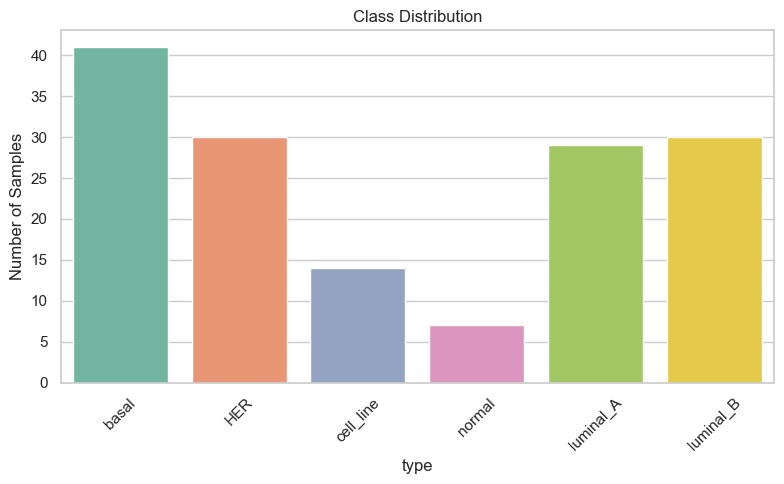

In [3]:
# 1.2 Check Class Distribution
label_col = 'type'  # adjust if column name differs
print("\n Class distribution:")
print(df[label_col].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x=label_col, data=df, palette='Set2')
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

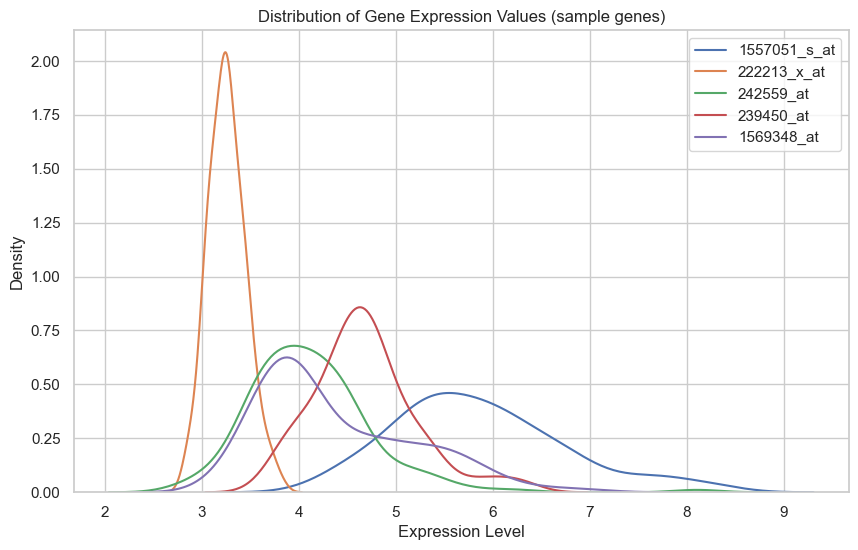

In [4]:
# 1.3 Gene Expression Distribution
# Plot distribution of values for a few random genes
sample_genes = np.random.choice(df.columns[1:-1], size=5, replace=False)

plt.figure(figsize=(10,6))
for gene in sample_genes:
    sns.kdeplot(df[gene], label=gene)
plt.title("Distribution of Gene Expression Values (sample genes)")
plt.xlabel("Expression Level")
plt.ylabel("Density")
plt.legend()
plt.show()

In [5]:
# 1.4 Statistical Summary
stats_df = df.describe().T
print("\n Statistical Summary of Gene Expression Features:")
print(stats_df.head())  # Only show first few for readability


 Statistical Summary of Gene Expression Features:
           count        mean        std        min         25%         50%  \
samples    151.0  160.668874  45.431226  84.000000  121.500000  159.000000   
1007_s_at  151.0   10.338901   0.613445   7.505488   10.103030   10.416819   
1053_at    151.0    7.631910   0.706464   5.855968    7.166075    7.531673   
117_at     151.0    6.224885   0.645435   4.763602    5.798087    6.235074   
121_at     151.0    7.339248   0.330827   6.632206    7.105841    7.333426   

                  75%         max  
samples    200.500000  238.000000  
1007_s_at   10.735117   11.675109  
1053_at      8.053832    9.627008  
117_at       6.612291    8.364749  
121_at       7.513084    8.374055  


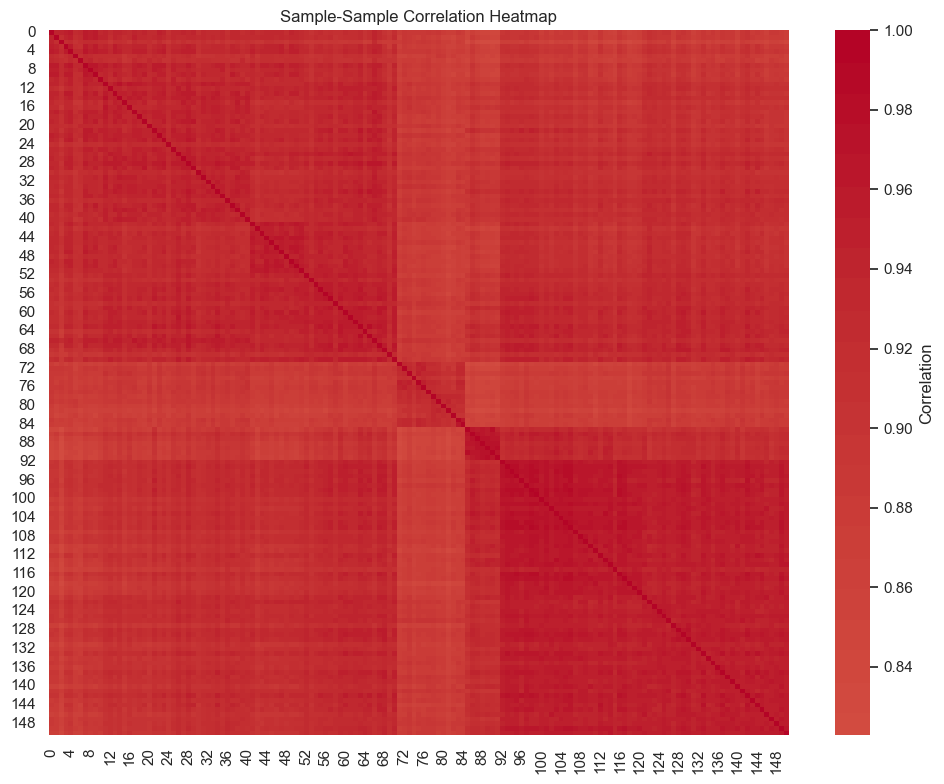

In [6]:
# 1.5 Sample-Sample Correlation Heatmap (Optional for small datasets)
sample_corr = df.drop(columns=[label_col]).T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(sample_corr, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title("Sample-Sample Correlation Heatmap")
plt.tight_layout()
plt.show()

In [7]:
# Encode labels for later use
le = LabelEncoder()
df['LabelEncoded'] = le.fit_transform(df[label_col])
print("\n Encoded classes:", dict(zip(le.classes_, le.transform(le.classes_))))


 Encoded classes: {'HER': 0, 'basal': 1, 'cell_line': 2, 'luminal_A': 3, 'luminal_B': 4, 'normal': 5}


# Data Preparation & Dimensionality Reduction

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA

In [9]:
# Separate features and labels
X = df.drop(columns=[label_col, 'LabelEncoded', 'samples'])
y = df['LabelEncoded']

print(f"Original shape: {X.shape}")

Original shape: (151, 54675)


In [10]:
# Step 1: Variance Threshold - remove genes with very low variance
# remove the features that have the same value in all samples.
selector = VarianceThreshold(threshold=0.01)  # 1% variance threshold
X_var = selector.fit_transform(X)
print(f"After variance thresholding: {X_var.shape[1]} features")

After variance thresholding: 54605 features


In [11]:
# Step 2: SelectKBest using ANOVA F-test
k = 1000  # Select top 1000 features
selector_kbest = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector_kbest.fit_transform(X_var, y)
print(f"Top {k} informative genes selected")

Top 1000 informative genes selected


In [12]:
# Optional: Save reduced data for modeling
reduced_df = pd.DataFrame(X_kbest, columns=[f"Gene_{i+1}" for i in range(X_kbest.shape[1])])
reduced_df['Label'] = y
reduced_df.to_csv('reduced_gene_expression.csv', index=False)
print("Reduced dataset saved as 'reduced_gene_expression.csv'")
reduced_df.head()

Reduced dataset saved as 'reduced_gene_expression.csv'


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_992,Gene_993,Gene_994,Gene_995,Gene_996,Gene_997,Gene_998,Gene_999,Gene_1000,Label
0,8.097927,8.107136,3.230610,9.297843,4.916666,3.526318,5.969829,6.445996,6.428210,7.840480,...,6.761262,8.292124,8.333853,9.854639,9.823275,12.229711,13.658701,13.477698,6.265781,1
1,8.212222,7.505800,3.057938,8.080503,4.773234,3.487936,6.771925,8.085199,7.188066,6.237397,...,7.405313,8.225366,8.499343,10.061910,9.796947,12.178531,13.750086,13.470146,6.771853,1
2,8.936137,7.072525,3.243240,9.055791,4.072165,5.998206,7.119607,5.155185,6.269661,7.066929,...,7.026349,8.218749,8.280136,9.699647,9.452066,12.125108,13.621732,13.295080,6.346952,1
3,7.357148,7.164589,3.236373,6.945914,5.277667,3.538109,6.566833,6.065227,6.970331,6.456195,...,7.066764,8.183538,8.233631,9.911691,9.611842,12.111235,13.743108,13.508861,6.610284,1
4,7.746404,8.225413,2.957655,7.975129,5.167289,4.014946,7.668322,7.783165,6.508379,6.276881,...,7.011404,8.307028,8.319234,9.868997,9.655341,12.173642,13.797774,13.542206,6.414354,1


# Modeling & Evaluation

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score

In [14]:
# Load reduced dataset
df = pd.read_csv('reduced_gene_expression.csv')
X = df.drop(columns=['Label'])
y = df['Label']

# Define models and pipelines
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=50),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=50),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=50)
}

# Scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

In [15]:
# Evaluate each model
for name, model in models.items():
    print(f"\n Evaluating {name} with 5-Fold Stratified CV...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    scores = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
    
    print(f" Mean Accuracy: {np.mean(scores['test_accuracy']):.4f}")
    print(f" Mean Macro F1 Score: {np.mean(scores['test_f1_macro']):.4f}")
    print(f" All Accuracies: {np.round(scores['test_accuracy'], 4)}")
    print(f" All Macro F1s: {np.round(scores['test_f1_macro'], 4)}")


 Evaluating Logistic Regression with 5-Fold Stratified CV...
 Mean Accuracy: 0.9800
 Mean Macro F1 Score: 0.9842
 All Accuracies: [1.  0.9 1.  1.  1. ]
 All Macro F1s: [1.     0.9211 1.     1.     1.    ]

 Evaluating SVM (RBF Kernel) with 5-Fold Stratified CV...
 Mean Accuracy: 0.9669
 Mean Macro F1 Score: 0.9741
 All Accuracies: [0.9677 0.9    1.     0.9667 1.    ]
 All Macro F1s: [0.9774 0.9211 1.     0.972  1.    ]

 Evaluating Random Forest with 5-Fold Stratified CV...
 Mean Accuracy: 0.9533
 Mean Macro F1 Score: 0.9623
 All Accuracies: [1.     0.9    0.9667 1.     0.9   ]
 All Macro F1s: [1.     0.92   0.972  1.     0.9195]


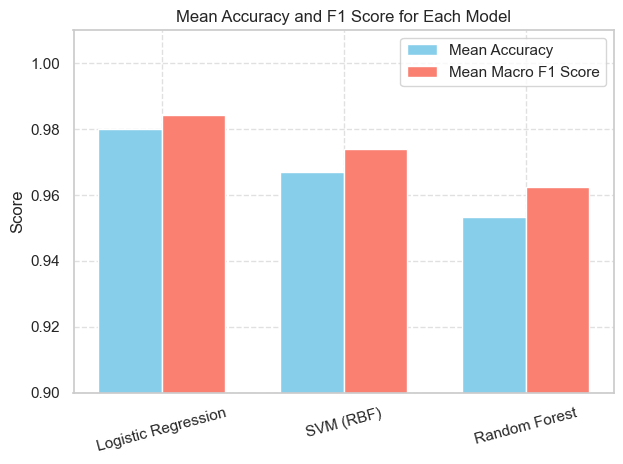

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'SVM (RBF)', 'Random Forest']

# Mean Accuracy and Macro F1 scores (from your results)
mean_accuracy = [0.9800, 0.9669, 0.9533]
mean_f1 = [0.9842, 0.9741, 0.9623]

x = np.arange(len(models))  # Label locations
width = 0.35  # Bar width

plt.figure()
# Accuracy bars
plt.bar(x - width/2, mean_accuracy, width, label='Mean Accuracy', color='skyblue')
# F1 Score bars
plt.bar(x + width/2, mean_f1, width, label='Mean Macro F1 Score', color='salmon')

# Add details
plt.ylabel('Score')
plt.title('Mean Accuracy and F1 Score for Each Model')
plt.xticks(x, models, rotation=15)
plt.ylim(0.9, 1.01)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Load the original dataset (not reduced!)
df = pd.read_csv('Breast_GSE45827.csv')  # Or your raw data filename
X_full = df.drop(columns=['samples', 'type'])      # All 54676 genes
y_full = y

# Define models again
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate
for name, model in models.items():
    print(f"\n Evaluating {name} on FULL dataset (54,676 genes)...")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    scores = cross_validate(pipeline, X_full, y_full, cv=kf, scoring=scoring)
    
    print(f" Mean Accuracy: {np.mean(scores['test_accuracy']):.4f}")
    print(f" Mean Macro F1 Score: {np.mean(scores['test_f1_macro']):.4f}")
    print(f" Accuracies: {np.round(scores['test_accuracy'], 4)}")
    print(f" Macro F1s: {np.round(scores['test_f1_macro'], 4)}")



 Evaluating Logistic Regression on FULL dataset (54,676 genes)...
 Mean Accuracy: 0.8940
 Mean Macro F1 Score: 0.8866
 Accuracies: [0.9032 0.9667 0.8667 0.9    0.8333]
 Macro F1s: [0.8774 0.9697 0.8307 0.9111 0.8442]

 Evaluating SVM (RBF Kernel) on FULL dataset (54,676 genes)...
 Mean Accuracy: 0.9335
 Mean Macro F1 Score: 0.9182
 Accuracies: [0.9677 0.9667 0.8667 0.9667 0.9   ]
 Macro F1s: [0.9774 0.975  0.9002 0.8205 0.9179]

 Evaluating Random Forest on FULL dataset (54,676 genes)...
 Mean Accuracy: 0.9540
 Mean Macro F1 Score: 0.9326
 Accuracies: [0.9032 1.     0.9667 0.9667 0.9333]
 Macro F1s: [0.9202 1.     0.975  0.8205 0.9471]


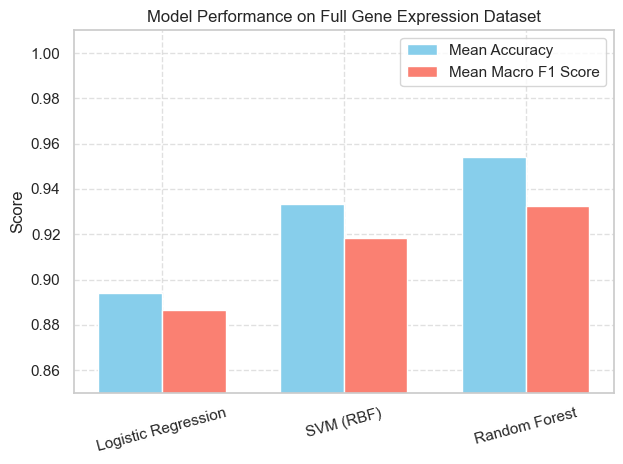

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'SVM (RBF)', 'Random Forest']

# Mean Accuracy and F1 from full feature dataset
mean_accuracy_full = [0.8940, 0.9335, 0.9540]
mean_f1_full = [0.8866, 0.9182, 0.9326]

x = np.arange(len(models))
width = 0.35

plt.figure()
# Accuracy bars
plt.bar(x - width/2, mean_accuracy_full, width, label='Mean Accuracy', color='skyblue')
# F1 Score bars
plt.bar(x + width/2, mean_f1_full, width, label='Mean Macro F1 Score', color='salmon')

# Labels and formatting
plt.ylabel('Score')
plt.title('Model Performance on Full Gene Expression Dataset')
plt.xticks(x, models, rotation=15)
plt.ylim(0.85, 1.01)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Observation from these accuracies

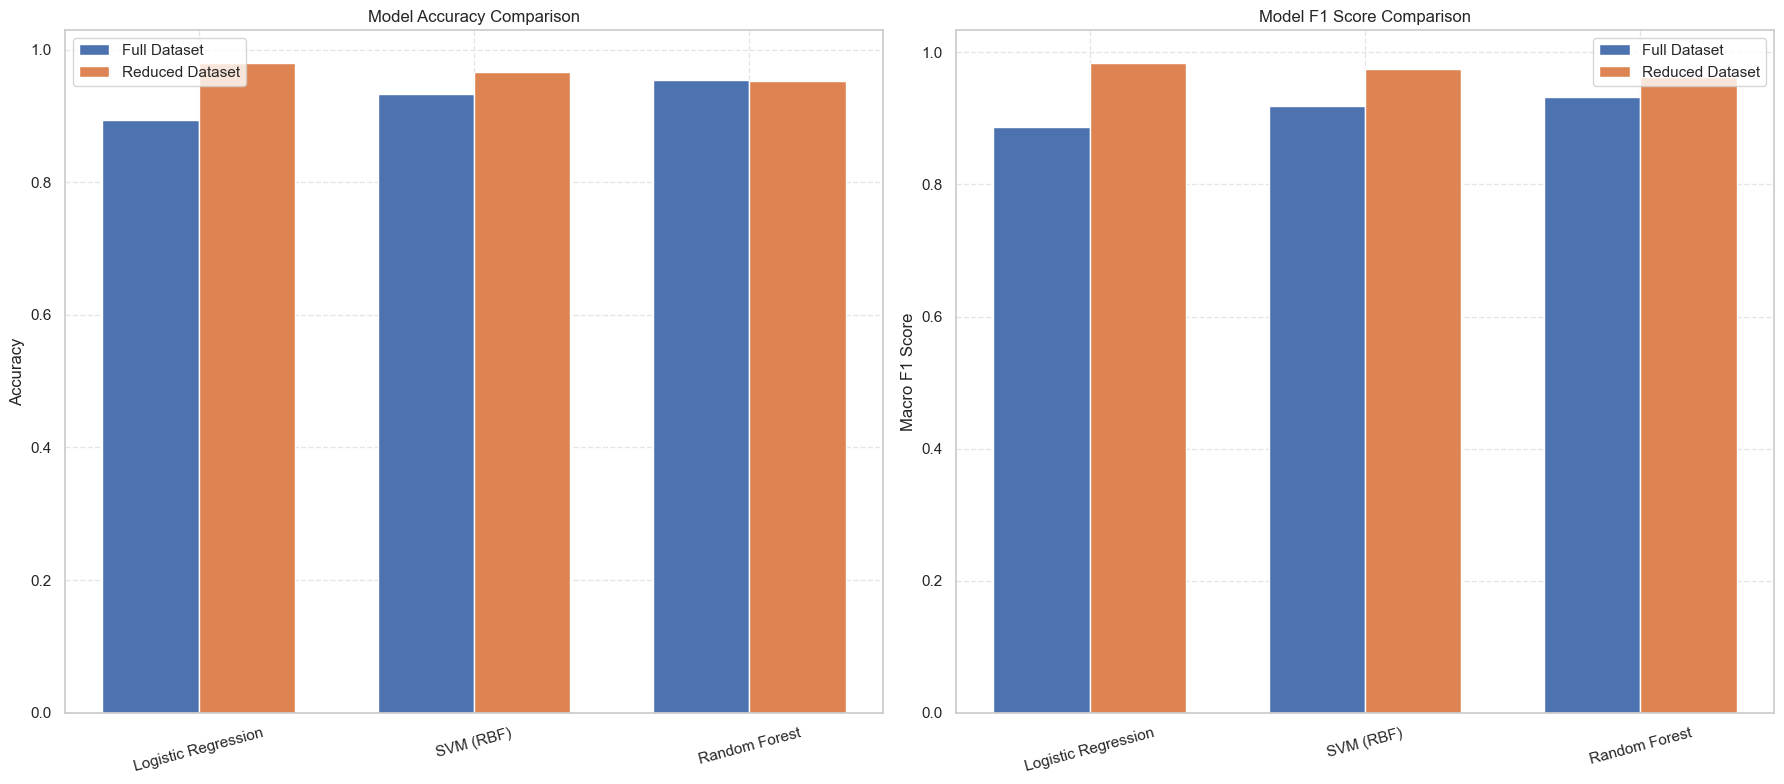

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define performance metrics for full and reduced datasets
models = ['Logistic Regression', 'SVM (RBF)', 'Random Forest']

# Accuracy and F1 for full dataset
accuracy_full = [0.8940, 0.9335, 0.9540]
f1_full = [0.8866, 0.9182, 0.9326]

# Accuracy and F1 for reduced dataset
accuracy_reduced = [0.9800, 0.9669, 0.9533]
f1_reduced = [0.9842, 0.9741, 0.9623]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Accuracy comparison
axs[0].bar(x - width/2, accuracy_full, width, label='Full Dataset')
axs[0].bar(x + width/2, accuracy_reduced, width, label='Reduced Dataset')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, rotation=15)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# F1 Score comparison
axs[1].bar(x - width/2, f1_full, width, label='Full Dataset')
axs[1].bar(x + width/2, f1_reduced, width, label='Reduced Dataset')
axs[1].set_ylabel('Macro F1 Score')
axs[1].set_title('Model F1 Score Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, rotation=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



**feature selection pipeline significantly improved performance**, especially for simpler models like Logistic Regression.

| Model               | Accuracy (Full) | Accuracy (Reduced) | Δ Accuracy | Δ F1 Macro |
| ------------------- | --------------- | ------------------ | ---------- | ---------- |
| Logistic Regression | 89.4%           | 98.0%              | 🔼 +8.6%   | 🔼 +9.8%   |
| SVM (RBF)           | 93.3%           | 96.7%              | 🔼 +3.4%   | 🔼 +5.6%   |
| Random Forest       | 95.4%           | 95.3%              | ⬇️ \~same  | 🔼 +3.0%   |

Random Forest is usually robust to noisy features, so it didn’t benefit *as much* from the reduction — but Logistic Regression **relies on good features**, so the improvement is massive.




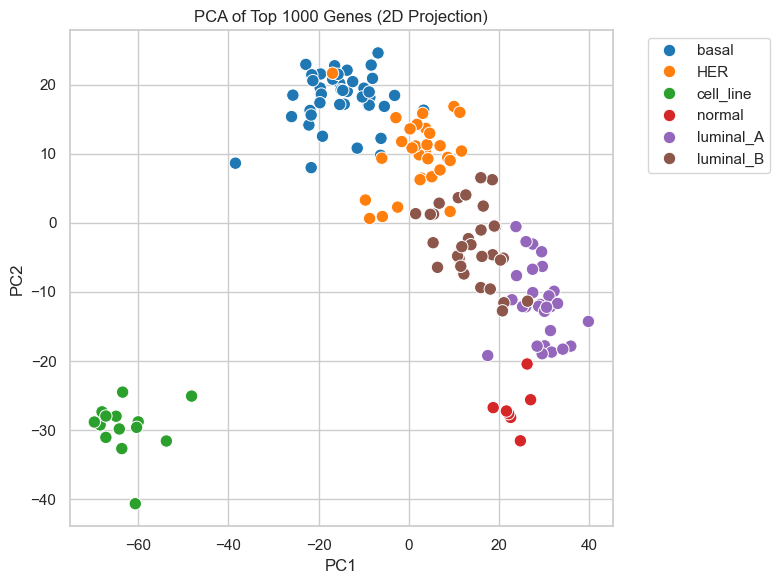

In [20]:
# Step 3: PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2, random_state=50)
X_pca = pca.fit_transform(X_kbest)



# Visualize PCA result
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Class': le.inverse_transform(y)
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='tab10', s=80)
plt.title('PCA of Top 1000 Genes (2D Projection)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

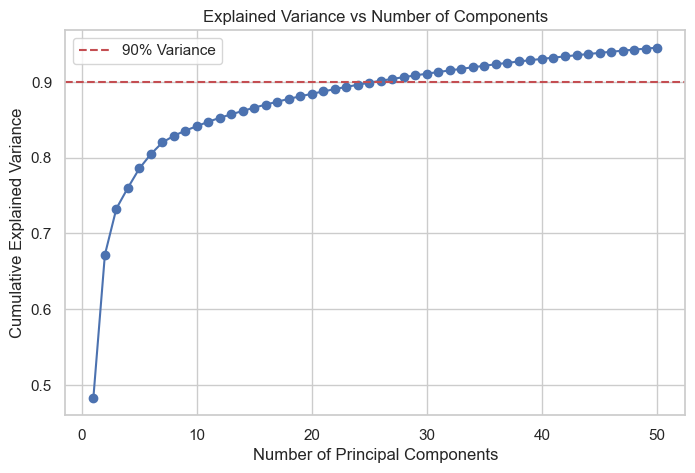

In [21]:
pca = PCA(n_components=50, random_state=50)
X_pca_temp = pca.fit_transform(X_kbest)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot it
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

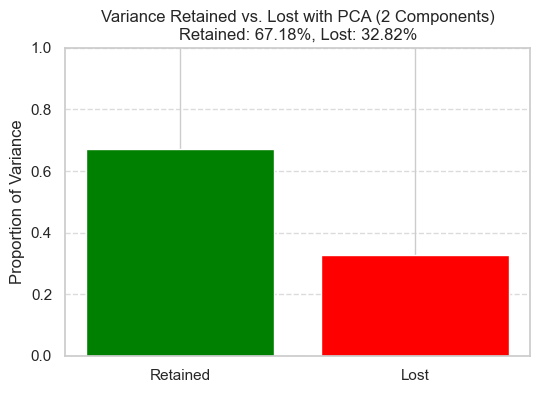

 Variance Retained: 0.6718 (67.18%)
 Variance Lost: 0.3282 (32.82%)


In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with 2 components on your preprocessed data (e.g., X_kbest)
pca_2 = PCA(n_components=2)
pca_2.fit(X_kbest)

# Get explained variance ratio for 2 components
explained_var = pca_2.explained_variance_ratio_
retained = explained_var.sum()
lost = 1 - retained

# Plot: Variance Retained vs. Lost
plt.figure(figsize=(6, 4))
plt.bar(['Retained', 'Lost'], [retained, lost], color=['green', 'red'])
plt.ylabel('Proportion of Variance')
plt.title(f'Variance Retained vs. Lost with PCA (2 Components)\nRetained: {retained*100:.2f}%, Lost: {lost*100:.2f}%')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: print exact values
print(f" Variance Retained: {retained:.4f} ({retained*100:.2f}%)")
print(f" Variance Lost: {lost:.4f} ({lost*100:.2f}%)")
